# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [32]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\jeffr\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


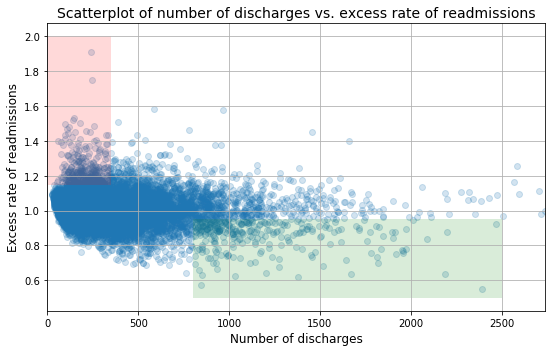

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Exercise A

A: The main point the preliminary report makes is that: "Overall, rate of readmissions is trending down with increasing number of discharges." From this point, they make a recommendation to offer incentives for consolidation of hospitals and facilities to phase out the smaller hospitals who are incurring higher operating costs due to readmission. The crux of the problem is that when one uses the eyeball test on the preliminary scatter plot, it is difficult to determine that rate of readmission trends down with increasing number of discharges. It is hard to see if the hospitals with high amounts of discharges and low readmission rates are outliers or not.

Thus before making any recommendations, it is probably best to do some statistical analyses to verify if in fact rate of readmissions is trending down with increasing number of discharges. At the moment I disagree with the analysis, because they have not proved that overall rate of readmissions trends down with increasing number of discharges. 

Exercise B1:

To determine the relationship between hospital discharges and readmission, we will set up a hypothesis test using two groups. The hospitals with discharges<100 and hospitals with discharges >1000 will be compared. 

The null hypothesis is that there is no difference in excess readmission rate between hospitals of low discharge rate and high discharge rate. 

The alternative hypothesis is that there is a difference in excess readmission rate between hospitals of low discharge rate and high discharge rate. 

In [6]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [7]:
#Creating the groups:

data = clean_hospital_read_df
small_hosp = data[data['Number of Discharges']<100]
large_hosp = data[data['Number of Discharges']>1000]


B2: Compute and report the observed significance value (or p-value).

In [10]:
#t-test to evaluate null hypothesis

T, p = stats.ttest_ind(small_hosp['Excess Readmission Ratio'].dropna(), 
                       large_hosp['Excess Readmission Ratio'].dropna(), 
                       equal_var=False)
print ('Test Statistic (T):', T)
print ('p-value:', p)

#Answer of B2

Test Statistic (T): 7.601742418500486
p-value: 1.2752435451140344e-13


B3: Report statistical significance for  𝛼  = .01.

At the alpha level of 0.01, we found a statistically significant result. This provides evidence to support rejecting the null hypothesis that the readmission rates between small discharge hospitals and large discharge hospitals are the same. 

B4:Discuss statistical significance and practical significance

In [18]:
corr = data[['Number of Discharges', 'Excess Readmission Ratio']]
corr.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

r = np.corrcoef(corr['Number of Discharges'], corr['Excess Readmission Ratio'])[0, 1]
print('correlation r = ', r)

correlation r =  -0.09739794351079352


The correlation between number of discharges a hospital has and excess readmission ratio is extremely weak. Thus even though our hypothesis test proves that there is a statistically significant difference in excess readmission ratio between hospitals with low discharges and high discharges, that relationship is really weak. So this is a case of statistical signifiance, but less practical significance. 

B5: Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The advantages to using a scatterplot is that it gives a good visual representation of the relationship between two different groups. It can show large quantities of data and visually represent correlation between variables as well as clustering effects. They can also reveal patterns within the data. 

The disadvantage is that the scatterplot cannot show relationship between three variables. In this case, we might have wanted to include a third group of medium discharge hospitals (>100 and <1000). Interpretation can also be subjective. And most importantly, correlation does not mean causation. 

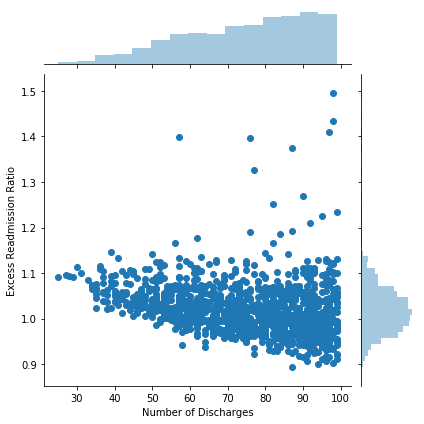

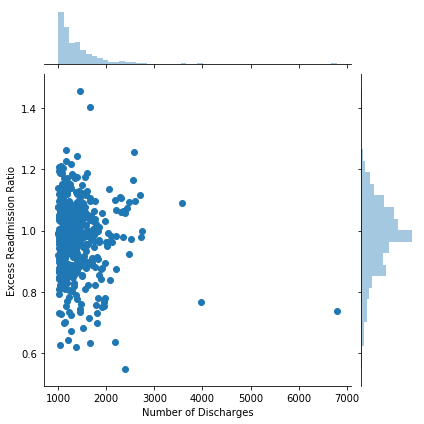

In [36]:
#To construct a new plot that displays the same information in a more direct manner


sns.jointplot(small_hosp['Number of Discharges'], small_hosp['Excess Readmission Ratio'], data=small_hosp, kind='scatter')

sns.jointplot(large_hosp['Number of Discharges'], large_hosp['Excess Readmission Ratio'], data=large_hosp, kind='scatter')
plt.show()

By subsetting the data into large and small discharge groups, we can compare excess readmission ratio more readily. 